In [9]:
import pandas as pd



TRATANDO COBERTURA VEGETAL PARA PADRAO

In [10]:
desmatamento = pd.read_excel("../data/deforestation/gfw_2023_statistics_summary_clean_melted.xlsx")
desmatamento = desmatamento.groupby("ano", as_index=False).agg({"desmatamento": "sum"})
desmatamento.rename(columns={"desmatamento": "cobertura_vegetal"}, inplace=True)

TRATANDO COBERTURA GELO PARA PADRAO

In [11]:
cobertura_gelo = pd.read_csv("../data/sea-ice-coverage/seaice-treated.csv")
cobertura_gelo["Year"] = cobertura_gelo["Year"].astype(int)
cobertura_gelo["ice-extent"] = cobertura_gelo["ice-extent"].astype(float)
cobertura_gelo  = cobertura_gelo.groupby("Year", as_index=False).agg({"ice-extent": "sum"})
cobertura_gelo.rename(columns={"Year": "ano", "ice-extent": "cobertura_gelo"}, inplace=True)

TRATANDO CO2 PARA PADRAO

In [12]:
emissao_co2 = pd.read_csv("../data/CO2/co2-fossil-plus-land-use.csv")
emissao_co2["Year"] = emissao_co2["Year"].astype(int)
emissao_co2["total_co2_emissions"] = emissao_co2["total_co2_emissions"].astype(float)
emissao_co2.rename(columns={"Year": "ano", "total_co2_emissions": "emissoes_totais_co2"}, inplace=True)
emissao_co2 = emissao_co2.groupby("ano", as_index=False).agg({"emissoes_totais_co2": "sum"})

TRATANDO TEMPERATURA PARA PADRAO

In [13]:
temperatura = pd.read_excel("../data/temperature/word-wide-temperature.xlsx")
temperatura["year"] = temperatura["year"].astype(int)
temperatura["celsius"] = temperatura["celsius"].astype(float)
temperatura.rename(columns={"year": "ano"}, inplace=True)
temperatura = temperatura.groupby(by="ano", as_index=False).agg({"celsius": "sum"})

In [14]:
cobertura_gelo
desmatamento
temperatura
emissao_co2

,ano,emissoes_totais_co2
0,1850,1.185960e+10
1,1851,8.581301e+09
2,1852,8.901930e+09
3,1853,9.235979e+09
4,1854,9.602718e+09
...,...,...
168,2018,1.842509e+11
169,2019,1.872214e+11
170,2020,1.778972e+11
171,2021,1.867064e+11


In [15]:
df1 = pd.merge(cobertura_gelo, desmatamento, how="inner", on="ano")
df2 = pd.merge(temperatura, emissao_co2, how="inner", on="ano")
df = pd.merge(df1, df2, how="inner", on="ano")
df.to_excel("../data/visao_geral_atributos_juntos.xlsx", index=False)

## construindo o heatmap de correlações

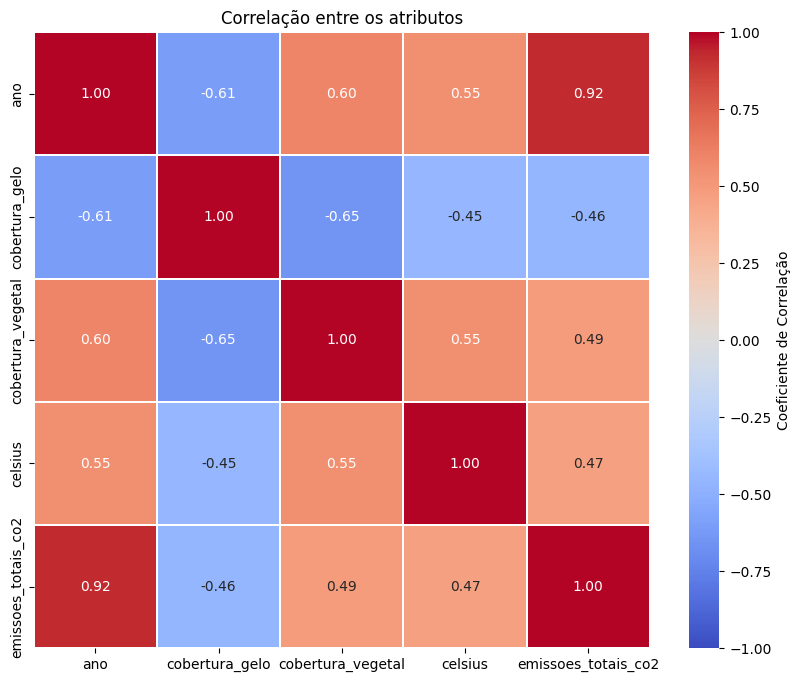

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)

# Criar a heatmap com números
plt.figure(figsize=(10, 8))  # Tamanho da figura
heatmap = sns.heatmap(df.corr(), fmt=".2f", cmap='coolwarm', 
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.01,
    annot=True,
    cbar_kws={'label': 'Coeficiente de Correlação'})

plt.title("Correlação entre os atributos")
plt.show()


## aplicando o standart scaler para diminuir a distância das variaveis